In [1]:
import fdtd
import numpy as np
import matplotlib.pyplot as plt
fdtd.set_backend("numpy")

In [2]:
grid = fdtd.Grid(
    shape = (300, 300, 1), # 25um x 15um x 1 (grid_spacing) --> 2D FDTD
    grid_spacing = 1e-7,
    permittivity = 1,
)

grid[50:250, 50, 0] = fdtd.LineSource(
    period = 1550e-9 / (3e8), name="source"
)

grid[50:250, 250, 0] = fdtd.LineDetector(name="detector")

grid[0:10, :, :] = fdtd.PML(name="pml_xlow")
grid[-10:, :, :] = fdtd.PML(name="pml_xhigh")
grid[:, 0:10, :] = fdtd.PML(name="pml_ylow")
grid[:, -10:, :] = fdtd.PML(name="pml_yhigh")

In [3]:

refractive_index = 1.7
x = y = np.linspace(-1,1,100)
X, Y = np.meshgrid(x, y)
circle_mask = X**2 + Y**2 < 1
permittivity = np.ones((100,100,1))
permittivity += circle_mask[:,:,None]*(refractive_index**2 - 1)
grid[170:270, 100:200, 0] = fdtd.Object(permittivity=permittivity, name="object")

In [4]:

grid.run(total_time=500)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:06<00:00, 76.42it/s]


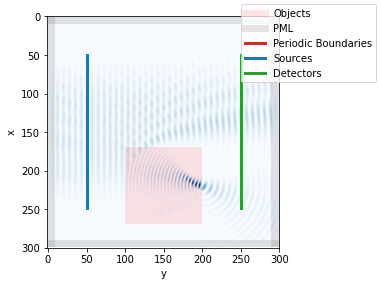

In [5]:

grid.visualize(z=0)

In [6]:

grid.object.inverse_permittivity.min()

0.34602076124567477